In [91]:
import numpy as np
import pandas as pd
import seaborn as sns
from rdkit import DataStructs
from rdkit.Chem import MACCSkeys
from rdkit.Chem import AllChem as Chem

# Structural keys

In [99]:
df = pd.read_csv('VEGF2.csv')
df = df.drop(['tid', 'standard_type', 'confidence_score', 'cmpd_pref_name', 'activity_comment'], axis=1)
df['mol'] = [Chem.MolFromSmiles(i) for i in df['canonical_smiles']]
df.head()

,cmpd_chembl_id,canonical_smiles,value
0,CHEMBL356626,CCCOCc1ccc2c(c1)c3c4CNC(=O)c4c5c(Cc6ccccc56)c3...,7.890
1,CHEMBL171558,COc1cc2c(Nc3cccc4occc34)ncnc2cc1OCCCN5CCOCC5,6.600
2,CHEMBL221053,CCc1cccc(NC(=O)Nc2ccc(cc2)c3cccc4[nH]nc(N)c34)c1,8.220
3,CHEMBL3754450,COc1cccc(c1)C(=O)CN2CCN(CC2)c3nnc(c4ccccc4)c5c...,5.470
4,CHEMBL383255,Cn1cnc(NCc2ccncc2)c1c3oc(Nc4ccc(OC(F)(F)F)cc4)nn3,7.105


## Structural keys

In [102]:
structural_keys = (
    Chem.MolFromSmiles('C(=O)O'),
    Chem.MolFromSmiles("CCC"),
    Chem.MolFromSmiles("c1ccccc1"),
    Chem.MolFromSmiles("C1CCCCC1"),
    Chem.MolFromSmiles("S"),
    Chem.MolFromSmiles("N"),
    Chem.MolFromSmiles("[NH2]"),
    Chem.MolFromSmiles("O")
    #Chem.MolFromSmiles('n'),
    #Chem.MolFromSmiles("[R]"),
    #Chem.MolFromSmiles("a"),
    #Chem.MolFromSmiles("[F,Cl,Br,I]"),
    #Chem.MolFromSmiles('[D3]'),
)
structural_keys

(<rdkit.Chem.rdchem.Mol at 0x145ba2d7280>,
 <rdkit.Chem.rdchem.Mol at 0x145ba2d7460>)

In [103]:
def get_structured_key(mol, keys):
    return [mol.HasSubstructMatch(key) for key in keys]
def structural_key(mol, keys):
    l = get_structured_key(mol, keys)
    return [int(i) for i in l]

In [105]:
structural_key(df['mol'][1], structural_keys)

[0, 1, 1, 0, 0, 1, 0, 1]

In [108]:
get_structured_key(df['mol'][1], structural_keys)

[False, True, True, False, False, True, False, True]

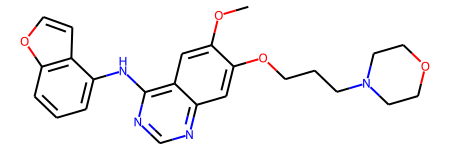

In [107]:
df['mol'][1]

In [109]:
df['structural_key'] = [tuple(structural_key(mol, structural_keys)) for mol in df['mol']]

In [110]:
#df['structural_key']
df.loc[df['structural_key'] == (0, 1, 1, 1, 0, 0, 0, 1)]

,cmpd_chembl_id,canonical_smiles,value,mol,structural_key
307,CHEMBL456936,CC(C)CCC[C@@H](C)[C@H]1CC[C@H]2[C@H](CCc3cc(O)...,5.22,<rdkit.Chem.rdchem.Mol object at 0x00000145BA4...,"(0, 1, 1, 1, 0, 0, 0, 1)"
841,CHEMBL1922224,CC(C)C\C=C\[C@@H](C)[C@H]1CC[C@H]2[C@H](CCc3cc...,5.30,<rdkit.Chem.rdchem.Mol object at 0x00000145BA4...,"(0, 1, 1, 1, 0, 0, 0, 1)"
842,CHEMBL1922225,CC(C)C(=C)CC[C@@H](C)[C@H]1CC[C@H]2[C@H](CCc3c...,5.31,<rdkit.Chem.rdchem.Mol object at 0x00000145BA4...,"(0, 1, 1, 1, 0, 0, 0, 1)"
1491,CHEMBL518060,CC(C)C\C=C\[C@@H](C)[C@H]1CC[C@H]2[C@H](CCc3cc...,5.34,<rdkit.Chem.rdchem.Mol object at 0x00000145BA4...,"(0, 1, 1, 1, 0, 0, 0, 1)"
6712,CHEMBL517956,CC(C)CCC[C@@H](C)[C@H]1CC[C@H]2[C@H](CCc3cc(O)...,5.36,<rdkit.Chem.rdchem.Mol object at 0x00000145BA2...,"(0, 1, 1, 1, 0, 0, 0, 1)"


In [111]:
#df['key'] = [tuple(get_structured_key(mol, structural_keys)) for mol in df['mol']]
#df.loc[df['key'] == (False, False, False, False, False, False, False, False)]
#df.loc[df['key'] == (True, True, True, True, True, True, True, True)]
#df.loc[df['key'] == (False, True, True, True, False, False, False, True)]

## MACCS

In [115]:
df['maccs'] = [MACCSkeys.GenMACCSKeys(mol) for mol in df['mol']]

In [116]:
len(df['maccs'][0])

167

In [117]:
DataStructs.FingerprintSimilarity(df['maccs'][0], df['maccs'][1]) # Tanimoto similarity

0.6197183098591549

In [200]:
def tanimoto(a, b):
    intersect = set(a).intersection(set(b))
    union = set(a).union(set(b))
    return len(intersect)/len(union)

In [201]:
tanimoto({'a','b'}, {'a','c','d'})

0.25

In [202]:
tanimoto(df['maccs'][0], df['maccs'][1])

1.0

## Fingerprint

In [184]:
finger = [Chem.GetMorganFingerprintAsBitVect(mol, 2, nBits=1024) for mol in df.mol] #do vzdálenosti 2
df['finger'] = finger

In [185]:
df.head()

,cmpd_chembl_id,canonical_smiles,value,mol,structural_key,maccs,finger
0,CHEMBL356626,CCCOCc1ccc2c(c1)c3c4CNC(=O)c4c5c(Cc6ccccc56)c3...,7.890,<rdkit.Chem.rdchem.Mol object at 0x00000145BA4...,"(0, 1, 1, 0, 0, 1, 0, 1)","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ..."
1,CHEMBL171558,COc1cc2c(Nc3cccc4occc34)ncnc2cc1OCCCN5CCOCC5,6.600,<rdkit.Chem.rdchem.Mol object at 0x00000145BA4...,"(0, 1, 1, 0, 0, 1, 0, 1)","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ..."
2,CHEMBL221053,CCc1cccc(NC(=O)Nc2ccc(cc2)c3cccc4[nH]nc(N)c34)c1,8.220,<rdkit.Chem.rdchem.Mol object at 0x00000145BA4...,"(0, 1, 1, 0, 0, 1, 0, 1)","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,CHEMBL3754450,COc1cccc(c1)C(=O)CN2CCN(CC2)c3nnc(c4ccccc4)c5c...,5.470,<rdkit.Chem.rdchem.Mol object at 0x00000145BA4...,"(0, 1, 1, 0, 0, 1, 0, 1)","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,CHEMBL383255,Cn1cnc(NCc2ccncc2)c1c3oc(Nc4ccc(OC(F)(F)F)cc4)nn3,7.105,<rdkit.Chem.rdchem.Mol object at 0x00000145BA4...,"(0, 0, 1, 0, 0, 1, 0, 1)","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [160]:
np_finger = np.array(finger)
np_finger[0][10:30]

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [186]:
DataStructs.FingerprintSimilarity(df.finger[0], df.finger[1]) # Tanimoto similarity

0.15454545454545454

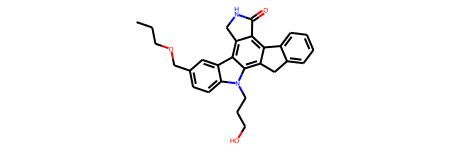

In [189]:
df['mol'][0]

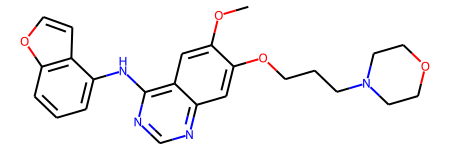

In [190]:
df.mol[1]

In [179]:
tanimoto(df.finger[0], df.finger[1])

1.0